In [1]:
import wbgapi as wb
import numpy as np
import matplotlib.pyplot as plt
from mpetools import pre_timeseries_steps, get_info_islands, timeseries_socioeconomics_WorldBank
import ee
import pandas as pd
%matplotlib inline

try:
    ee.Initialize()

except Exception as e:
    ee.Authenticate()
    ee.Initialize()

In [5]:
island_info = get_info_islands.retrieveInfoIslands("Nauru", "Nauru")



-------------------------------------------------------------------
RETRIEVING ISLAND INFORMATION
Island: Nauru, Nauru
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               country_ID
spatial_reference
               latitude
               longitude
               polygon
               crs
               crs_transform
               extent
               meshgrid
image_collection_dict
               Description
               S2
               L7
               L8
               L9
OpenStreetMap
               gdf_roads_nodes
               gdf_roads_edges
               gdf_buildings
               coords_roads_filled
               coords_buildings_filled
               mask_roads_buildings
World Bank
               date_range
               DataFrame
               DataFrame_no_missing_value


In [4]:
island_info = timeseries_socioeconomics_WorldBank.getWorldBankData('Banaba', 'Kiribati', [2010, 2021])


-------------------------------------------------------------------
RETRIEVING ISLAND INFORMATION
Island: Banaba, Kiribati
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               country_ID
spatial_reference
               latitude
               longitude
               polygon
               crs
               crs_transform
               extent
               meshgrid
image_collection_dict
               Description
               S2
               L7
               L8
               L9
OpenStreetMap
               gdf_roads_nodes
               gdf_roads_edges
               gdf_buildings
               coords_roads_filled
               coords_buildings_filled
               mask_roads_buildings
World Bank
               date_range
               DataFrame
               DataFrame_no_missing_value

-----------------------------------------------------

In [6]:
dfmv.head()

,id,description,time_series
0,DC.DAC.AUSL.CD,"Net bilateral aid flows from DAC donors, Austr...","[23329999.9237061, 33830001.8310547, 23299999...."
1,DC.DAC.JPNL.CD,"Net bilateral aid flows from DAC donors, Japan...","[1639999.98569489, 1820000.05245209, 1740000.0..."
2,DC.DAC.NZLL.CD,"Net bilateral aid flows from DAC donors, New Z...","[1700000.04768372, 1610000.01430511, 2460000.0..."
3,DC.DAC.TOTL.CD,"Net bilateral aid flows from DAC donors, Total...","[27779999.9900163, 37440001.8975139, 29019999...."
4,DT.ODA.ALLD.CD,Net official development assistance and offici...,"[27780000.6866455, 37529998.7792969, 35619998...."


In [4]:
island_info = pre_timeseries_steps.getInfoIsland('Nauru', 'Nauru', cloud_threshold=10)
island_info

-------------------------------------------------------------------
PRE-TIME-SERIES INFORMATION
Island: Nauru, Nauru
-------------------------------------------------------------------

~ All information is already available, returning information ~



{'island': 'Nauru',
 'country': 'Nauru',
 'latitude': -0.5279214340653108,
 'longitude': 166.93532989185923,
 'geometry': ee.Geometry({
   "functionInvocationValue": {
     "functionName": "GeometryConstructors.Polygon",
     "arguments": {
       "coordinates": {
         "constantValue": [
           [
             [
               166.89932989185922,
               -0.49192143406531075
             ],
             [
               166.89932989185922,
               -0.5639214340653108
             ],
             [
               166.97132989185923,
               -0.5639214340653108
             ],
             [
               166.97132989185923,
               -0.49192143406531075
             ]
           ]
         ]
       },
       "geodesic": {
         "constantValue": false
       }
     }
   }
 }),
 'image_collection_dict': {'Description': 'Filtered (cloud threshold of 10%) ImageCollection for satellites of interest for Nauru, Nauru',
  'S2': <ee.imagecollection.ImageColl

# Information

In [12]:
#help(wb)
#wb.source.info() # list of data sources
aa = wb.economy.info(q='Nauru') # list of countries/area
#wb.region.info(q='NRU') # list of regions

aa.items[0]['id']

'NRU'

# Series (actual data)

In [5]:
series_info = wb.series.info()
df_series_info = pd.DataFrame(vars(series_info).get('items'))

df_series_info.id[0]

'AG.AGR.TRAC.NO'

In [5]:
island_info['socioeconomic'] = {}
island_info['socioeconomic']['NY.ADJ.AEDU.CD'] = ['name', np.arange(1, 10)]
island_info

{'island': 'Nauru',
 'country': 'Nauru',
 'latitude': -0.5279214340653108,
 'longitude': 166.93532989185923,
 'geometry': ee.Geometry({
   "functionInvocationValue": {
     "functionName": "GeometryConstructors.Polygon",
     "arguments": {
       "coordinates": {
         "constantValue": [
           [
             [
               166.89932989185922,
               -0.49192143406531075
             ],
             [
               166.89932989185922,
               -0.5639214340653108
             ],
             [
               166.97132989185923,
               -0.5639214340653108
             ],
             [
               166.97132989185923,
               -0.49192143406531075
             ]
           ]
         ]
       },
       "geodesic": {
         "constantValue": false
       }
     }
   }
 }),
 'image_collection_dict': {'Description': 'Filtered (cloud threshold of 10%) ImageCollection for satellites of interest for Nauru, Nauru',
  'S2': <ee.imagecollection.ImageColl

In [6]:
date_range = range(2010, 2022)
#island_info['socioeconomic'] = {'date_range': date_range}

for idx in range(len(df_series_info.id)):

    print(df_series_info.value[idx])
    print(df_series_info.id[idx])
    data_wb = wb.data.DataFrame(df_series_info.id[idx], 'NRU', time=date_range)
    #print(data_wb)

    if np.all(np.isnan(data_wb.loc[data_wb.index == 'NRU'].values[0])):
        continue

    else:
        print([df_series_info.value[idx], data_wb.loc[data_wb.index == 'NRU'].values[0]])
        #island_info['socioeconomic'][df_series_info.id[idx]] = [df_series_info.value[idx], data_wb.loc[data_wb.index == 'NRU'].values[0]]
        #print(data_wb)
        #plt.title(df_series_info.value[idx])
        #plt.plot(date_range, data_wb.loc[data_wb.index == 'NRU'].values[0], marker='o')
        #plt.show()

Agricultural machinery, tractors
AG.AGR.TRAC.NO
Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.PT.ZS
Fertilizer consumption (kilograms per hectare of arable land)
AG.CON.FERT.ZS
Agricultural land (sq. km)
AG.LND.AGRI.K2
['Agricultural land (sq. km)', array([ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan])]
Agricultural land (% of land area)
AG.LND.AGRI.ZS
['Agricultural land (% of land area)', array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., nan])]
Arable land (hectares)
AG.LND.ARBL.HA
Arable land (hectares per person)
AG.LND.ARBL.HA.PC
Arable land (% of land area)
AG.LND.ARBL.ZS
Land under cereal production (hectares)
AG.LND.CREL.HA
['Land under cereal production (hectares)', array([nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0., nan])]
Permanent cropland (% of land area)
AG.LND.CROP.ZS


KeyboardInterrupt: 

In [19]:
import pickle
import os

island_info_path = os.getcwd()+'\\data\\info_islands'
# Save dictionary
fw = open(island_info_path + '\\info_{}_{}.data'.format('Nauru', 'Nauru'), 'wb')
pickle.dump(island_info, fw)
fw.close()

In [35]:
aa = data_wb.loc[data_wb.index == 'NRU'].values[0]
np.all(np.isnan(aa))

True

In [3]:
dict_se = island_info['socioeconomic']['AG.LND.AGRI.K2'][1][:-1]
dict_se

all(x==dict_se[0] for x in dict_se)

True

In [5]:
size_arr = len(island_info['socioeconomic'])
dict_se = island_info['socioeconomic']
list_keys = []
list_descriptions = []
list_arrays = []

for (key, item) in island_info['socioeconomic'].items():
    #print(key, item)

    if key == 'date_range': continue

    if not np.any(np.isnan(dict_se[key][1])) and not all(x==dict_se[key][1][0] for x in dict_se[key][1]):
        list_keys.append(key)
        list_descriptions.append(dict_se[key][0])
        list_arrays.append(dict_se[key][1])
        #print(dict_se[key][0])
        #print(dict_se[key][1])

data_arr = np.array([list_keys, list_descriptions, list_arrays], dtype=object).T
data_df = pd.DataFrame(data_arr, index=None, columns=['id', 'description', 'time_series'])
print(data_df)

                    id                                        description  \
0       DC.DAC.AUSL.CD  Net bilateral aid flows from DAC donors, Austr...   
1       DC.DAC.JPNL.CD  Net bilateral aid flows from DAC donors, Japan...   
2       DC.DAC.NZLL.CD  Net bilateral aid flows from DAC donors, New Z...   
3       DC.DAC.TOTL.CD  Net bilateral aid flows from DAC donors, Total...   
4       DT.ODA.ALLD.CD  Net official development assistance and offici...   
..                 ...                                                ...   
131  SP.POP.TOTL.MA.ZS           Population, male (% of total population)   
132        SP.URB.GROW                 Urban population growth (annual %)   
133        SP.URB.TOTL                                   Urban population   
134  TM.UVI.MRCH.XD.WD               Import unit value index (2015 = 100)   
135  TX.UVI.MRCH.XD.WD               Export unit value index (2015 = 100)   

                                           time_series  
0    [23329999.923

In [6]:
relevant_var = [3, 7, 18, 19, 20, 24, 28, 59, 62, 63, 64, 65, 66, 67, 123, 126, 127, 132] # 39, 46, 49, 50
data_selection = data_df.iloc[relevant_var]
#print(data_selection)
var_names = data_selection.id.to_list()

print(data_selection.time_series)

#plt.plot(range(2010, 2022), data_selection.time_series[3])

3      [27779999.9900163, 37440001.8975139, 29019999....
7      [48.4433926274208, 46.4343863549312, 30.305212...
18     [3.7037037037037, -5.97014925373134, 17.021276...
19     [100.0, 128.358208955224, 125.531914893617, 17...
20     [-19.0, 12.7946127946128, 25.9823332318002, -2...
24     [47564520.3910861, 66055407.6703145, 96927201....
28     [11.1111111111111, 10.0, 11.3636363636364, 30....
59     [37.6, 36.9, 36.0, 35.1, 34.2, 33.3, 32.4, 31....
62     [24.0, 23.7, 23.1, 22.6, 22.0, 21.4, 20.8, 20....
63     [99.0, 99.0, 79.0, 87.0, 95.0, 91.0, 97.0, 87....
64     [99.0, 99.0, 79.0, 87.0, 95.0, 91.0, 97.0, 87....
65     [99.0, 99.0, 96.0, 97.0, 98.0, 98.0, 98.0, 95....
66     [34.0, 56.0, 68.0, 76.0, 84.0, 103.0, 101.0, 8...
67     [-252.0, -207.0, -32.0, -34.0, -31.0, -31.0, -...
123    [60.8449819381184, 62.3204419889503, 63.801756...
126    [0.0781478988682006, 0.409277515375299, 1.5535...
127    [10241.0, 10283.0, 10444.0, 10694.0, 10940.0, ...
132    [0.0781478988682228, 0.4

# Getting the data

<Axes: >

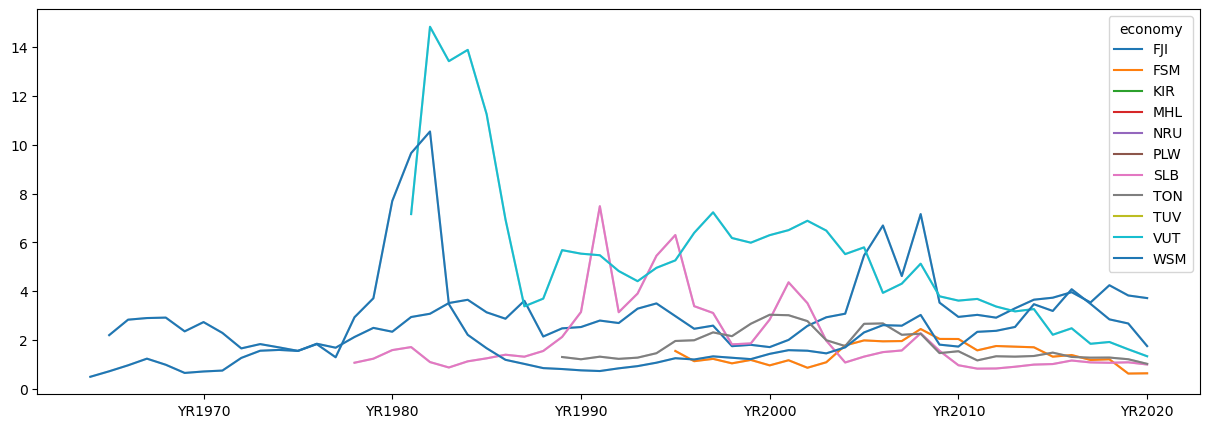

In [26]:
gdppercap = wb.data.DataFrame(np.random.choice(df_series_info.id), wb.region.members('PSS'))
g5=gdppercap.sort_values(by=['YR2021'],ascending=False)
ax=gdppercap.T.plot(color='lightgray', legend=False)
g5.T.plot(ax=ax, figsize=(15,5))

# Tigramite

In [7]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

[[ 2.77800000e+07  4.84433926e+01  3.70370370e+00  1.00000000e+02
  -1.90000000e+01  4.75645204e+07  1.11111111e+01  3.76000000e+01
   2.40000000e+01  9.90000000e+01  9.90000000e+01  9.90000000e+01
   3.40000000e+01 -2.52000000e+02  6.08449819e+01  7.81478989e-02
   1.02410000e+04  7.81478989e-02]
 [ 3.74400019e+07  4.64343864e+01 -5.97014925e+00  1.28358209e+02
   1.27946128e+01  6.60554077e+07  1.00000000e+01  3.69000000e+01
   2.37000000e+01  9.90000000e+01  9.90000000e+01  9.90000000e+01
   5.60000000e+01 -2.07000000e+02  6.23204420e+01  4.09277515e-01
   1.02830000e+04  4.09277515e-01]
 [ 2.90199993e+07  3.03052122e+01  1.70212766e+01  1.25531915e+02
   2.59823332e+01  9.69272015e+07  1.13636364e+01  3.60000000e+01
   2.31000000e+01  7.90000000e+01  7.90000000e+01  9.60000000e+01
   6.80000000e+01 -3.20000000e+01  6.38017566e+01  1.55356046e+00
   1.04440000e+04  1.55356046e+00]
 [ 2.85400006e+07  2.34373040e+01  2.18750000e+01  1.71875000e+02
  -2.18085106e+01  9.84918436e+07  3.

c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\tigramite\data_processing.py:308: UserWarning: In analysis mode 'single', 'data'.shape = (12, 18); is it of shape (observations, variables)?
  warnings.warn("In analysis mode 'single', 'data'.shape = ({}, {});"\
c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\tigramite\plotting.py:368: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  pyplot.tight_layout()


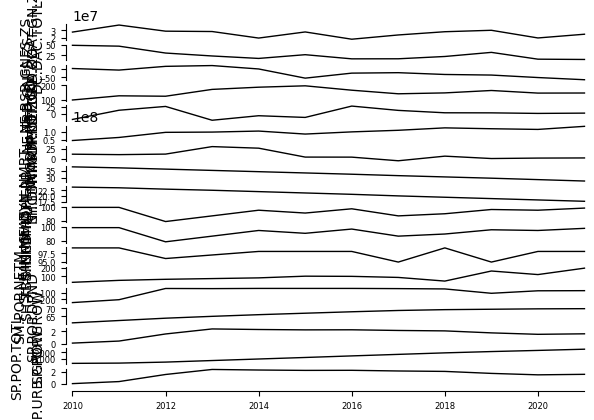

In [8]:
data = np.zeros((12, len(relevant_var)))

it = 0
for i in relevant_var:
    data[:,it] = data_selection.time_series[i]
    it += 1
var_names = data_selection.id.to_list()

print(data)

dataframe = pp.DataFrame(data, var_names=var_names, datatime={0:np.arange(2010, 2022)})
tp.plot_timeseries(dataframe); plt.show()
#print(data)

In [12]:
%matplotlib qt
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=5, val_only=True)['val_matrix']

matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 5


c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\tigramite\independence_tests\parcorr.py:100: UserWarning: Possibly constant array!
  warnings.warn("Possibly constant array!")
c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [67]:
tp.plot_densityplots(dataframe=dataframe, add_densityplot_args={'matrix_lags':matrix_lags})
plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 5


c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\tigramite\independence_tests\parcorr.py:100: UserWarning: Possibly constant array!
  warnings.warn("Possibly constant array!")
c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


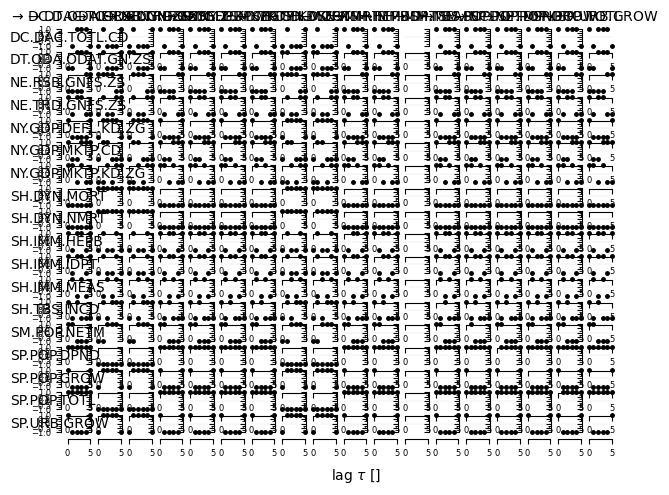

In [9]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

correlations = pcmci.get_lagged_dependencies(tau_max=5, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()

In [ ]:

pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=4, pc_alpha=None, alpha_level=0.05)

In [15]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

In [19]:
%matplotlib qt
tau_max = 4
pc_alpha = 0.05
link_assumptions = None
results = pcmci.run_pcmciplus(tau_max=tau_max, 
                              pc_alpha=pc_alpha,
                              link_assumptions=link_assumptions,
                             )
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    ); plt.show()


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 4
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable DC.DAC.TOTL.CD has 0 link(s):

    Variable DT.ODA.ODAT.GN.ZS has 0 link(s):

    Variable NE.RSB.GNFS.ZS has 2 link(s):
        (SP.POP.GROW -1): max_pval = 0.00904, min_val =  1.000
        (SP.URB.GROW -1): max_pval = 0.00955, min_val = -1.000

    Variable NE.TRD.GNFS.ZS has 1 link(s):
        (DT.ODA.ODAT.GN.ZS -4): max_pval = 0.00062, min_val =  0.999

    Variable NY.GDP.DEFL.KD.ZG has 0 link(s):

    Variable NY.GDP.MKTP.CD has 0 link(s):

    Variable NY.GDP.MKTP.KD.ZG has 1 link(s):
        (NE.RSB.GNFS.ZS -3): max_pval = 0.04024, min_val = -0.960

    Variable SH.DYN.MORT has 1 link(s):
        (NY.GDP.MKTP.CD -3): max_pval = 0.00324, min_val = -0.997

    Variable SH.DYN.NMRT has 1 link(s):
        (SH.DYN.NMRT -1): max_pval = 0.00000, min_

c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))



## Significant links at alpha = 0.05:

    Variable DC.DAC.TOTL.CD has 0 link(s):

    Variable DT.ODA.ODAT.GN.ZS has 0 link(s):

    Variable NE.RSB.GNFS.ZS has 19 link(s):
        (SP.POP.GROW -1): pval = 0.00904 | val =  1.000
        (SP.URB.GROW -1): pval = 0.00955 | val = -1.000
        (DC.DAC.TOTL.CD  0): pval = 0.00000 | val =  0.000
        (DT.ODA.ODAT.GN.ZS  0): pval = 0.00000 | val =  0.000
        (NE.TRD.GNFS.ZS  0): pval = 0.00000 | val =  0.000
        (NY.GDP.DEFL.KD.ZG  0): pval = 0.00000 | val =  0.000
        (NY.GDP.MKTP.CD  0): pval = 0.00000 | val =  0.000
        (NY.GDP.MKTP.KD.ZG  0): pval = 0.00000 | val =  0.000
        (SH.DYN.MORT  0): pval = 0.00000 | val =  0.000
        (SH.DYN.NMRT  0): pval = 0.00000 | val =  0.000
        (SH.IMM.HEPB  0): pval = 0.00000 | val =  0.000
        (SH.IMM.IDPT  0): pval = 0.00000 | val =  0.000
        (SH.IMM.MEAS  0): pval = 0.00000 | val =  0.000
        (SH.TBS.INCD  0): pval = 0.00000 | val =  0.000
        (SM.PO